In [1]:
from sklearn.linear_model import Perceptron
from sklearn.datasets import load_iris
import numpy as np
import matplotlib.pyplot as plt

c:\Users\julia\anaconda3\envs\DataCampTutorials\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


### Perceptron

Perceptron is the simplest NN architecture. It may take in multiple inputs and spits a single binary output. It consists of one layer and may learn only linear patterns. It's learning is similar to that of SGD since it updates weights based on the prediction error. However for that purpose the Logistic Regression is much more feasible since it returns probabilities. 

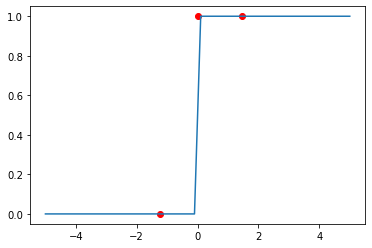

In [2]:
X = np.linspace(-5, 5, 50)
y = (1 / (1 + np.exp(-X))).round().astype('int')

per_clf = Perceptron()
per_clf.fit(X.reshape(-1, 1), y)
plt.plot(X, y)
X_test = np.array([-1.23, 0.00000004, 1.45])
plt.scatter(X_test, per_clf.predict(X_test.reshape(-1, 1)), c='red')

Perceptron doesn't really make sense since changes to weights & biases may result in drastic changes to the output (fluctuates between 0 and 1). 

#### Activation Functions 

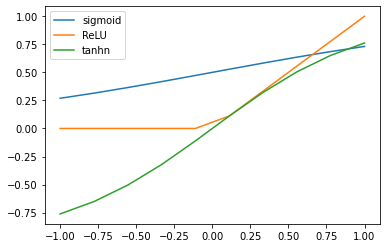

In [3]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def ReLU(x):
    return np.max(np.c_[np.zeros(len(x)), x], axis=1)

def tanhn(x):
    return np.tanh(x)

x = np.linspace(-1, 1, 10)
plt.plot(x, sigmoid(x), label='sigmoid')
plt.plot(x, ReLU(x), label='ReLU')
plt.plot(x, tanhn(x), label='tanhn')
plt.legend()

##### Softmax Function

It is a function used to scale outputs of the last layer into probablities for multi-classification problem. $$ f(z) = \frac{e^{z_i}}{\sum_{j=1}^K e^{z_j}}$$

In [4]:
outputs = np.array([[-1], [1], [5.0]])

def softmax(x):
    return np.exp(x) / np.sum(np.exp(x))

prob = softmax(outputs)
print(prob)

print(outputs[0, 0] / outputs[1, 0])
# Softmax has tendency to produce values either very close to 0 or close to 1
print(prob[0, 0] / prob[1, 0])

[[0.00242826]
 [0.01794253]
 [0.97962921]]
-1.0
0.1353352832366127


In [5]:
import torch 

x = torch.tensor([[5.0, 4.0]])
x.requires_grad_()
w = torch.tensor([[2.0], [1.0]], requires_grad=True)
b = torch.tensor([[0.5]])

a1 = torch.matmul(x, w) + b
a1.backward()

x.grad

tensor([[2., 1.]])

In [6]:
x = torch.tensor([[5.0, 4.0]])
w = torch.tensor([[2.0, 2.0], [1.0, 1.0]])
b = torch.tensor([[0.5, 0.3]])

a = torch.matmul(x, w.T) + b
a

tensor([[18.5000,  9.3000]])

#### Convolutions

In [15]:
from sklearn.datasets import load_sample_image

china = load_sample_image('china.jpg') / 255
flower = load_sample_image('flower.jpg') / 255
images = np.array([china, flower])
batch_size, width, height, channels = images.shape
print(batch_size, width, height, channels)

2 427 640 3


In [16]:
print(china.shape)
# Upper left pixels' channels
print(china[0, 0, :])

(427, 640, 3)
[0.68235294 0.78823529 0.90588235]


In [20]:
# as a shape pass in width x height x channels x number of maps
filters = np.zeros(shape=(7, 7, channels, 2), dtype=np.float32)
# detects verticals lines
filters[:, 3, :, 0] = 1
# detects horizontal lines
filters[3, :, :, 1] = 1

In [23]:
import tensorflow as tf 

convoluted = tf.nn.conv2d(images, filters, strides=1, padding='SAME')

In [25]:
convoluted.shape

TensorShape([2, 427, 640, 2])

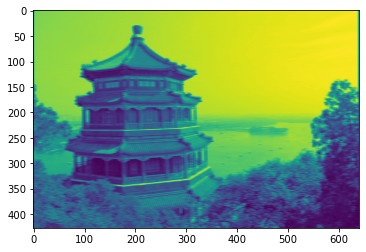

In [32]:
# each map has two channels
# here we project the second channel from the first map
plt.imshow(convoluted[0, :, :, 1])